<a href="https://colab.research.google.com/github/Hoahot/HoangDucHoa19146185/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 92 images belonging to 8 classes.
Found 23 images belonging to 8 classes.
Epoch 1/5
3/3 [==============================] - 70s 23s/step - loss: 44.3345 - accuracy: 0.1739 - val_loss: 68.0221 - val_accuracy: 0.0870
Epoch 2/5
3/3 [==============================] - 26s 9s/step - loss: 39.3730 - accuracy: 0.0761 - val_loss: 18.0053 - val_accuracy: 0.1304
Epoch 3/5
3/3 [==============================] - 27s 8s/step - loss: 16.3524 - accuracy: 0.1630 - val_loss: 5.6320 - val_accuracy: 0.2174
Epoch 4/5
3/3 [==============================] - 27s 9s/step - loss: 4.7196 - accuracy: 0.1522 - val_loss: 2.6495 - val_accuracy: 0.2174
Epoch 5/5
3/3 [==============================] - 26s 8s/step - loss: 2.2850 - accuracy: 0.1522 - val_loss: 2.0742 - val_accuracy: 0.1739


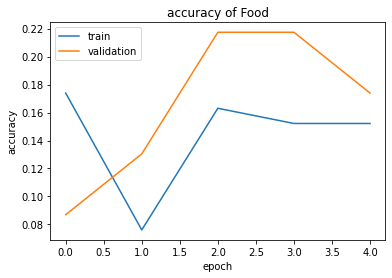

In [3]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
train_path = '/content/drive/MyDrive/Food/'
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

train_data = train.flow_from_directory('/content/drive/MyDrive/Food/Train/',
                                       target_size = (700,300),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Food/Test/',
                                       target_size = (700,300),
                                       class_mode = 'categorical')
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(700,300,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=5,batch_size=128,validation_data=validation_dataset,verbose=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of Food')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
